### SEGMENTACIÓN DE LOS CLIENTES

Con el objetivo de segmentar a los clientes, se va a proceder a realizar un clustering. Para ello se realizan los siguientes pasos.

#### Clustering

1. Se realiza la **importación** de las librerías necesarias y de los dataset. Tambien se realiza el **merge** de los tres archivos.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

url_demo = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/clustering/files/datosdemograficos_limpio.csv'
url_perf = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/clustering/files/performancelimpio.csv'
url_prev = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/clustering/files/previous_loan_limpio.csv'

In [9]:
df_demo = pd.read_csv(url_demo)
df_perf = pd.read_csv(url_perf)
df_prev = pd.read_csv(url_prev)

df = pd.merge(df_demo, df_perf,on='customerid')
df = pd.merge(df, df_prev,on='customerid')
pd.set_option('display.max_columns', None)
df.head()

,customerid,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,Heritage Bank,Keystone Bank,Skye Bank,Stanbic IBTC,Standard Chartered,Sterling Bank,UBA,Union Bank,Unity Bank,Wema Bank,Zenith Bank,Not known,Permanent,Retired,Self-Employed,Student,Unemployed,loanamount,totaldue,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious
0,8a858e135cb22031015cbafc76964ebd,48,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10000.0,13000.0,30,3000.0,23.076923,1.0,10000.0,11500.0,15.0,3667.000000
1,8a858e275c7ea5ec015c82482d7c3996,36,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000.0,13000.0,30,3000.0,23.076923,1.0,10000.0,13000.0,30.0,3668.000000
2,8a858e5b5bd99460015bdc95cd485634,35,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10000.0,13000.0,30,3000.0,23.076923,2.0,10000.0,12000.0,20.0,3611.666667
3,8a858efd5ca70688015cabd1f1e94b55,30,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10000.0,11500.0,15,1500.0,13.043478,1.0,10000.0,11500.0,15.0,3668.000000
4,8a858e785acd3412015acd48f4920d04,39,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,20000.0,22250.0,15,2250.0,10.112360,3.0,12000.0,13575.0,15.0,3631.600000


2. Se elimina la varibale **customerid** la cual era necesaria para el merge de los archivos pero para el clustering ha de ser eliminada ya que contiene únicamente valores únicos.

In [10]:
df.drop(['customerid'], axis=1, inplace= True)


3. Se realiza la **normalización** y e**standarización** de los datos

In [11]:
#%% Se normalizan los datos con MinMax()
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.


In [12]:
df_escalado

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051635,0.2,0.333333,1.000000,0.00000,0.230769,0.230257,0.000000,0.000484
1,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051635,0.2,0.333333,1.000000,0.00000,0.230769,0.269065,0.333333,0.000492
2,0.264706,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051635,0.2,0.333333,1.000000,0.06250,0.230769,0.243193,0.111111,0.000059
3,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025818,0.0,0.166667,0.565217,0.00000,0.230769,0.230257,0.000000,0.000492
4,0.382353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.210843,0.0,0.250000,0.438202,0.12500,0.288462,0.283941,0.000000,0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,0.588235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.210843,0.0,0.250000,0.438202,0.06250,0.230769,0.243193,0.111111,0.000036
5812,0.147059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025818,0.0,0.166667,0.565217,0.03125,0.230769,0.230257,0.000000,0.000258
5813,0.205882,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051635,0.2,0.333333,1.000000,0.03125,0.230769,0.269065,0.333333,0.011978
5814,0.647059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025818,0.0,0.166667,0.565217,0.00000,0.230769,0.230257,0.000000,0.000077


4. Se realiza la segmentación de los clientes mediante dos métodos: el **método 

*   El **método del codo**.
*   El **Shiloutte score**



4.1- Método del codo

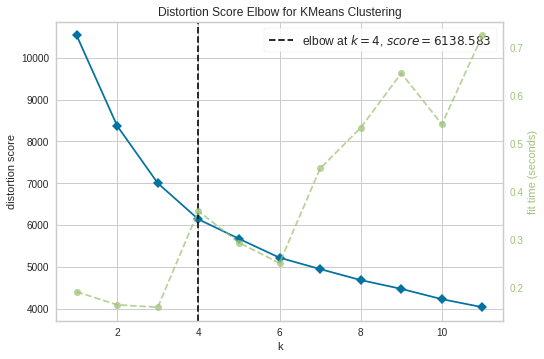

In [13]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_escalado)
visualizer.show()

Como se puede observar en la gráfica, el número óptimo del cluster según es método del codo son 4.

4.2-Shiloutte Score

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df_escalado)
    preds = clusterer.predict(df_escalado)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df_escalado, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29024556071576874)
For n_clusters = 3, silhouette score is 0.27089594158422103)
For n_clusters = 4, silhouette score is 0.22831679699945345)
For n_clusters = 5, silhouette score is 0.2439666488732586)
For n_clusters = 6, silhouette score is 0.27676471434790256)
For n_clusters = 7, silhouette score is 0.28488195042469905)
For n_clusters = 8, silhouette score is 0.3027211560238279)
For n_clusters = 9, silhouette score is 0.31929146829850497)


Como se puede observar, según el Shiloutte score el número de clusters óptimos son 9

Debido a que nos interesa una segmentación de los clientes pequeña, el método escogido para continuar el proceso es el **método del codo**. Por lo tanto, el número de clusters óptimo es 4

In [16]:
clusters = 4
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(df_escalado)
print(kmeans.labels_)

[0 1 0 ... 1 1 1]


5. Se procede a realizar la **visualización de los clusters**.

Para ello, se ha de realizar un PCA con el objetivo de reducir el número de variables.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_escalado)
pca_data = pd.DataFrame(pca.transform(df_escalado))
pca_data.head()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.22419864 0.158906   0.14150663]
Cumulative variance explained by 3 principal components: 52.46%


Se escogen **3 componentes principales** ya que explican un 51% del modelo.

A continuación se puede observar gráficamente la distribución de los clusters.

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


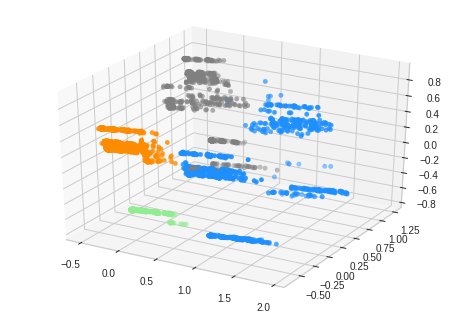

In [18]:
import math
from matplotlib import colors as mcolors
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer


colors = list(zip(*sorted((
					tuple(mcolors.rgb_to_hsv(
						mcolors.to_rgba(color)[:3])), name)
					for name, color in dict(
							mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
													).items())))[1]



skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
		c = list(map(lambda label : cluster_colors[label],
											kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:'', pca_data[0], pca_data[1],
		pca_data[2], str_labels))